In [1]:
import gsidiag as gd
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
import csv

In [2]:
DIRdiag = "/home/patrick/readDiag/data"

varName = "amsua"
varType = "n15"
dateIni="2020010100" 
dateFin="2020010106" 
nHour = "6"          
vminOMA = -2.0       
vmaxOMA = 2.0        
vminSTD = 0.0        
vmaxSTD = 14.0       
Level = 1000
Lay = None           
SingleL = "All" 

datei = datetime.strptime(str(dateIni), "%Y%m%d%H")
datef = datetime.strptime(str(dateFin), "%Y%m%d%H")
dates = [dates.strftime('%Y%m%d%H') for dates in pd.date_range(datei, datef,freq="6H").tolist()]

print(dates)


['2020010100', '2020010106']


In [3]:
paths, pathsc = [], []

OuterL = "01"        
[paths.append(DIRdiag+"/"+dt+"/diag_amsua_n15_"+OuterL+"."+dt) for dt in dates]

OuterLc = "03"
[pathsc.append(DIRdiag+"/"+dt+"/diag_amsua_n15_"+OuterLc+"."+dt) for dt in dates]

print(paths)
print("")
print(pathsc)

['/home/patrick/readDiag/data/2020010100/diag_amsua_n15_01.2020010100', '/home/patrick/readDiag/data/2020010106/diag_amsua_n15_01.2020010106']

['/home/patrick/readDiag/data/2020010100/diag_amsua_n15_03.2020010100', '/home/patrick/readDiag/data/2020010106/diag_amsua_n15_03.2020010106']


In [4]:
read = True

if read:        
    gdf_list = []
    print("")
    print("Aguarde, o tempo total estimado para a leitura dos arquivos é de "+
          str(int((float(len(paths))*20 )/60))+" minutos e "+
          str(int((float(len(paths))*20 )%60))+" segundos.")
    print("")
    for path, pathc in zip(paths,pathsc):
        print("Reading "+path)
        gdf = gd.read_diag(path,pathc)
        gdf_list.append(gdf)

    print(gdf_list)
    
    pd.set_option('display.max_columns', None)
    pd.set_option('display.max_rows', None)
    

    organizar_campos = ['lat','lon','elev','nchan','time','iuse','idqc','inverr','oer','obs',
                     'omf','omf_nobc','emiss','oma','oma_nobc','imp','dfs']
    
    
    for objeto in gdf_list:
        
        nome_arquivo_csv = str(objeto._diagFile) + ".csv"

        with open(nome_arquivo_csv, mode='w', newline='') as arquivo_csv:

            escritor_csv = csv.DictWriter(arquivo_csv, fieldnames=organizar_campos)
        
            dados = []

            dados_dict = {
                'lat': objeto.obsInfo[varName].loc[varType].lat,
                'lon': objeto.obsInfo[varName].loc[varType].lon,
                'elev': objeto.obsInfo[varName].loc[varType].elev,
                'nchan': objeto.obsInfo[varName].loc[varType].nchan,
                'time': objeto.obsInfo[varName].loc[varType].time,
                'iuse': objeto.obsInfo[varName].loc[varType].iuse,
                'idqc': objeto.obsInfo[varName].loc[varType].idqc,
                'inverr': objeto.obsInfo[varName].loc[varType].inverr,
                'oer': objeto.obsInfo[varName].loc[varType].oer,
                'obs': objeto.obsInfo[varName].loc[varType].obs,
                'omf': objeto.obsInfo[varName].loc[varType].omf,
                'omf_nobc': objeto.obsInfo[varName].loc[varType].omf_nobc,
                'emiss': objeto.obsInfo[varName].loc[varType].emiss,
                'oma': objeto.obsInfo[varName].loc[varType].oma,
                'oma_nobc': objeto.obsInfo[varName].loc[varType].oma_nobc,
                'imp': objeto.obsInfo[varName].loc[varType].imp,
                'dfs': objeto.obsInfo[varName].loc[varType].dfs
                }

            dados.append(dados_dict)
            
            df = pd.DataFrame(dados_dict)
            
            pd.set_option('display.width', None)
            
            df.to_csv(arquivo_csv, index=True)
                
            arquivo_csv.close()   
        
        print(f'Dados salvos no arquivo {nome_arquivo_csv}')
        
    print("Done!")    


Aguarde, o tempo total estimado para a leitura dos arquivos é de 0 minutos e 40 segundos.

Reading /home/patrick/readDiag/data/2020010100/diag_amsua_n15_01.2020010100
 
>>> GSI DIAG <<<
 
Reading /home/patrick/readDiag/data/2020010106/diag_amsua_n15_01.2020010106
 
>>> GSI DIAG <<<
 
[<gsidiag.__main__.read_diag object at 0x7fed77c58550>, <gsidiag.__main__.read_diag object at 0x7fed79f1ae10>]
Dados salvos no arquivo /home/patrick/readDiag/data/2020010100/diag_amsua_n15_01.2020010100.csv
Dados salvos no arquivo /home/patrick/readDiag/data/2020010106/diag_amsua_n15_01.2020010106.csv
Done!


In [5]:
gd.read_diag.tocsv(gdf_list, varName="amsua", varType="n15", dateIni=dateIni, dateFin=dateFin, nHour="06", Level=None, Lay = 0, SingleL="None")


 Analyzing data of variable: amsua  ||  type: n15  ||  Satelite NOAA-15  ||  check: OmF

 Preparing data for: 2020-01-01:00  - No information on this date 
 Preparing data for: 2020-01-01:06  - No information on this date 


 Calculating for 2020-01-01:00
 Calculating for 2020-01-01:06



 Saving Dataset in CSV File...  
 Done 



A variável gdf_list é uma lista de dataframes contendo os dados de cada arquivo diagnóstico. Para trabalhar com um único tempo basta informar a lista com o indice fixo, por exemplo: gdf_list[0]. 

In [6]:
gdf_list
gdf_list1 = [ ]
gdf_list1.append(gdf_list[0])

In [7]:
gdf_list1

In [8]:
tidx =1

In [9]:
gdf_list[tidx].pfileinfo()

Variable Name : amsua
              └── kx => n15  



In [10]:
gdf_list

In [11]:
varName = "amsua"
varType = "n15"
print("Variável: ", varName)
print("VarType: ", varType)
print("DataIni", dateIni)
print("DataFin: ", dateFin)
print("nHour: ", nHour)


Variável:  amsua
VarType:  n15
DataIni 2020010100
DataFin:  2020010106
nHour:  6


2020010100


/home/patrick/anaconda3/envs/readDiag/lib/python3.7/site-packages/geopandas/plotting.py:684: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/home/patrick/anaconda3/envs/readDiag/lib/python3.7/site-packages/geopandas/plotting.py:684: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


OSError: 'seaborn-v0_8-ticks' not found in the style library and input is not a valid URL or path; see `style.available` for list of available styles

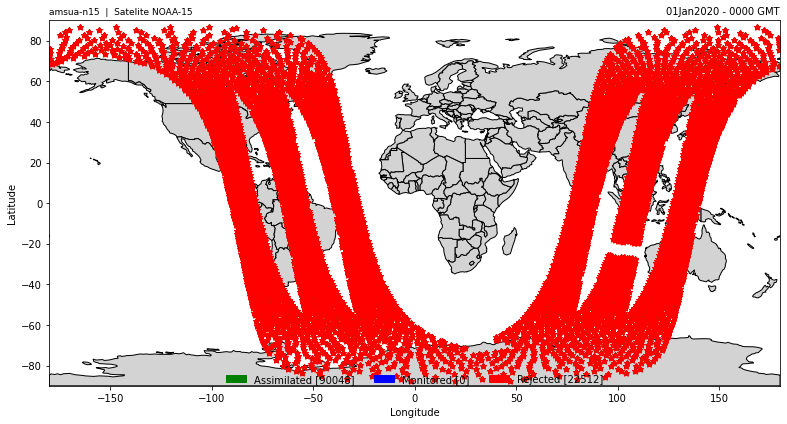

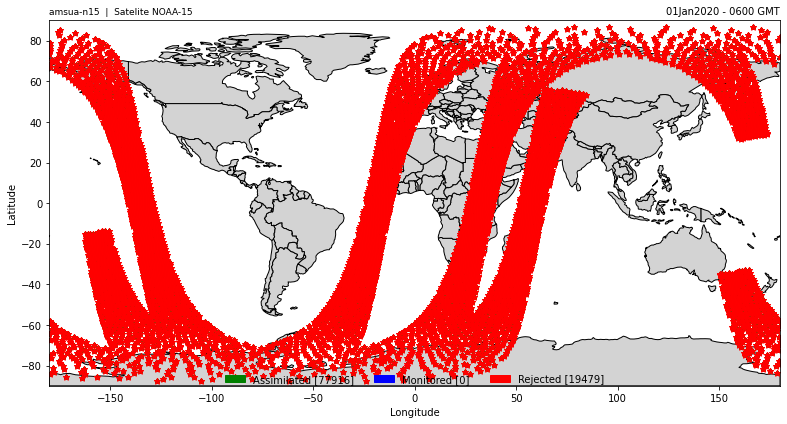

<Figure size 432x288 with 0 Axes>

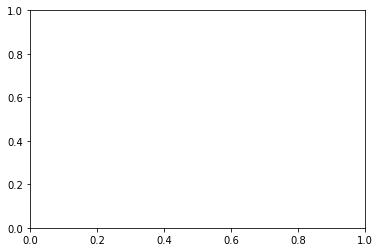

In [12]:
i=0
print(dates[i])
gd.plot_diag.statcount(gdf_list,  varName=varName, varType=varType, noiqc=False, dateIni=dateIni, dateFin=dateFin, nHour=nHour, figTS=True, figMap=True)

In [ ]:
i=1
print(dates[i])
gd.plot_diag.statcount(gdf_list1,  varName=varName, varType=varType, noiqc=True, dateIni=dates[i], dateFin=dates[i], nHour=nHour, figTS=False, figMap=True)

Para acessar uma variável específica.

In [ ]:
print()
varName = "amsua"
varType = "n15"
tidx =1
print("Variável: ", varName)
gdf_list[tidx].obsInfo[varName]

Para acessar variável e tipo específicos.

In [ ]:
print()
tidx =1
print("Variável: ", varName, " e Tipo: ", varType)
gdf_list[tidx].obsInfo[varName].loc[varType]

varType pode ser uma lista, ex: varType=[220,221].

In [ ]:
print()
tidx =0
print()
varName = "amsua"
varType = "n15"
print("Variável: ", varName, " e Tipo: ", varType)
gdf_list[tidx].obsInfo[varName].loc[varType]

Para acessar o valor da observação:

In [ ]:
print()
tidx =1
print()
varName = "amsua"
varType = "n15"
print("Variável: ", varName, " e Tipo: ", varType)
gdf_list[tidx].obsInfo[varName].loc[varType]

In [ ]:
gd.plot_diag.statcount(gdf_list,  varName=varName, varType=varType, noiqc=False, dateIni=dateIni, dateFin=dateFin, nHour=nHour, figTS=True, figMap=False)

Utilizando as funções da classe plot_diag são paresentados abaixo os comandos para gerar diversos tipos de figuras.

Gerando a figura com os valores das observações (param = "obs") para a variável e tipo selecionados. 

In [ ]:
print(varName)
param = "imp"
gd.plot_diag.plot(gdf_list[tidx],varName=varName,varType=varType,param=param,legend='true')

Para salvar a figura, execute os comandos a seguir:

In [ ]:
figname=varName+"_"+param+"_"+"plot.png"
plt.tight_layout()
plt.savefig(figname)
plt.close()

In [ ]:
varTypes = ['n15']
idschar="_".join([str(item) for item in varTypes])
gd.plot_diag.ptmap(gdf_list[tidx],varName=varName,varType=varTypes)
figname=varName+"_"+idschar+"_"+"ptmap.png"
plt.tight_layout()
plt.savefig(figname)

In [ ]:
varNames=['amsua']
idschar="_".join([str(item) for item in varNames])
gd.plot_diag.pvmap(gdf_list[tidx],varName=varNames,mask='iuse==1')
figname=idschar+"_pvmap.png"
plt.tight_layout()
plt.savefig(figname)

In [ ]:
gd.plot_diag.pcount(gdf_list[tidx],varName)

In [ ]:
gd.plot_diag.vcount(gdf_list[tidx])

In [ ]:
gd.plot_diag.kxcount(gdf_list[tidx])

<a id='time_series'></a>
A seguir são apresentadas as opções de figuras com a função time_series, incluída na classe plot_diag. Inicialmente é gerada uma figura com os parâmetros já fixados acima. Em seguida são apresentadas figuras alterando os parâmetros _Level_, _Lay_ e _SingleL_.

In [ ]:
print("varName= ", varName)
print("varType= ", varType)
print("dateIni= ", dateIni)
print("dateFin= ", dateFin)
print("nHour= ", nHour)
print("vminOMA= ", vminOMA)
print("vmaxOMA= ", vmaxOMA)
print("vminSTD= ", vminSTD)
print("vmaxSTD= ", vmaxSTD)

Lay=0

print(Level)
print(Lay)
print(SingleL)
gd.plot_diag.time_series(gdf_list,varName=varName, varType=varType, dateIni=dateIni, dateFin=dateFin, nHour=nHour, vminOMA=vminOMA, vmaxOMA=vmaxOMA, vminSTD=vminSTD, vmaxSTD=vmaxSTD, Level=Level, Lay=Lay, SingleL=SingleL,Clean=False)
plt.show()

No caso anterior, Level estava fixo em 1000 hPa com SingleL igual a "All", ou seja, toda a atmosfera foi considerada como uma única camada e o valor 1000hPa funciona apenas como uma flag para indicar que não existe variação em altura. Ainda com Level = 1000, pode-se usar SingleL = "OneL" para uma única camada em torno do valor de Level, neste caso 1000 hPa, variando entre Level-Lay e Level+Lay (Na definição de variáveis Lay foi fixado com 15 hPa, no caso de ser None, o valor padrão de 50 hPa é utilizado.)

In [ ]:
SingleL = SingleL
Lay = Lay
gd.plot_diag.time_series(gdf_list,varName=varName, varType=varType, dateIni=dateIni, dateFin=dateFin, nHour=nHour, vminOMA=vminOMA, vmaxOMA=vmaxOMA, vminSTD=vminSTD, vmaxSTD=vmaxSTD, Level=Level, Lay=Lay, SingleL=SingleL,Clean=False)
plt.show()

Observe como no exemplo acima a quantidade de dados diminui, uma vez que agora está sendo utilizada uma camada entre 1015 e 985 hPa.

Agora vamos alterar para não fixar em um único nível ou camada, ou seja, altear a variável Level para None ou "Zlevs". A opção None busca os dados em cada nível existente nos arquivos e faz a figura para todos esses níveis, porém os valores no eixo Y são apenas dos níveis padrões. é importante esclarecer que os chamados níveis padrões estão definidos na função read_diag e podem ser acessados com:

In [ ]:
gdf_list[tidx].zlevs

Estes são os níveis utilizados quando opta-se por Level = "Zlevs".

In [ ]:
Level = "Zlevs"
Lay = 15
gd.plot_diag.time_series(gdf_list,varName=varName, varType=varType, dateIni=dateIni, dateFin=dateFin, nHour=nHour, vminOMA=vminOMA, vmaxOMA=vmaxOMA, vminSTD=vminSTD, vmaxSTD=vmaxSTD, Level=Level, Lay=Lay, SingleL=SingleL,Clean=False)
plt.show()

Se Lay = None, então as camadas são preenchidas variando entre o valor médio considerando as camadas inferiores e superiores. Por exemplo, para o nível de 700 hPa é construída uma camada entre 750 e 650 hPa, uma vez que os níveis inferiores e superiores são 800 e 600 hPa, respectivamente. Para o nível de 1000 hPa a camada varia entre 1050 e 950 hPa.

In [ ]:
Level = "Zlevs"
Lay = None
gd.plot_diag.time_series(gdf_list,varName=varName, varType=varType, dateIni=dateIni, dateFin=dateFin, nHour=nHour, vminOMA=vminOMA, vmaxOMA=vmaxOMA, vminSTD=vminSTD, vmaxSTD=vmaxSTD, Level=Level, Lay=Lay, SingleL=SingleL,Clean=False)
plt.show()

Finalmente, existe a opção de considerar todos os níveis, ou seja, Level = None. Esta opção traz certa dificuldade na visualização da informação na figura por conta da grande quatidade de níveis e distribuição dos dados em todos os níveis.

In [ ]:
Level = None
gd.plot_diag.time_series(gdf_list,varName=varName, varType=varType, dateIni=dateIni, dateFin=dateFin, nHour=nHour, vminOMA=vminOMA, vmaxOMA=vmaxOMA, vminSTD=vminSTD, vmaxSTD=vmaxSTD, Level=Level, Lay=Lay, SingleL=SingleL,Clean=False)
plt.show()

O **_GSIDIAG_** é um pacote em desenvolvimento e com constante atualização. Desta forma, este documento pode ser alterado e adicionadas novas funcionalidades com o decorrer do desenvolvimento do pacote.